作业3

1、给定一方差，编制三个函数，分别生成高斯滤波器、DOG和LOG滤波器

2、打开任意一幅灰度图片，用生成的滤波器，对其进行滤波并显示

3、编程实现Harris角点检测算法

1、给定一方差，编制三个函数，分别生成高斯滤波器、DOG和LOG滤波器：

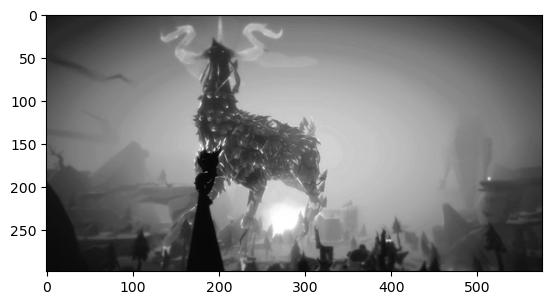

In [16]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math
 
img = Image.open('image.bmp')#选择自己的图片路径导入
s=np.array(img.convert('L'))
 
plt.imshow(s, cmap='gray')#彩色图转灰度图

In [2]:
def generate_gaussian_filter(size, sigma):
    kernel = np.fromfunction(lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x-size//2)**2 + (y-size//2)**2)/(2*sigma**2)), (size, size))
    kernel /= np.sum(kernel)  # 归一化
    return kernel

def generate_dog_filter(size, sigma1, sigma2):
    kernel1 = generate_gaussian_filter(size, sigma1)
    kernel2 = generate_gaussian_filter(size, sigma2)
    kernel = kernel1 - kernel2
    return kernel

def generate_log_filter(size, sigma):
    kernel = np.fromfunction(lambda x, y: ((x-size//2)**2 + (y-size//2)**2 - 2*sigma**2) / (sigma**4) * np.exp(-((x-size//2)**2 + (y-size//2)**2)/(2*sigma**2)), (size, size))
    kernel /= np.sum(np.abs(kernel))  # 归一化
    return kernel

In [3]:
# 生成高斯滤波器
gaussian_filter = generate_gaussian_filter(20, 5.0)

# 生成DOG滤波器
dog_filter = generate_dog_filter(5, 1.0, 2.0)

# 生成LOG滤波器
log_filter = generate_log_filter(7, 1.0)

2、打开任意一幅灰度图片，用生成的滤波器，对其进行滤波并显示

In [4]:
def conv2d(input, kernel, bias=0, stride=1, padding=False):
    #input可以是图像经数组化的二维矩阵，kernel为卷积核本身输入，函数应可计算图像尺寸，改写卷积核，偏置，步长和填充。
    input_height, input_width = input.shape
    kernel_height, kernel_width = kernel.shape
    # padding
    if padding:
        padding = kernel_width // 2
        padded_input = np.pad(input, padding, mode='constant')
    else:
        padding = 0
        padded_input = input
    # 计算输出尺寸
    output_height = (input_height - kernel_height + 2 * padding) // stride + 1
    output_width = (input_width - kernel_width + 2 * padding) // stride + 1
    # 创建输出图像数组
    output = np.zeros((output_height, output_width))
    # 卷积
    for y in range(0, output_height):
        for x in range(0, output_width):
            conv_result = np.sum(padded_input[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel)
            conv_result += bias
            output[y, x] = conv_result
    return output

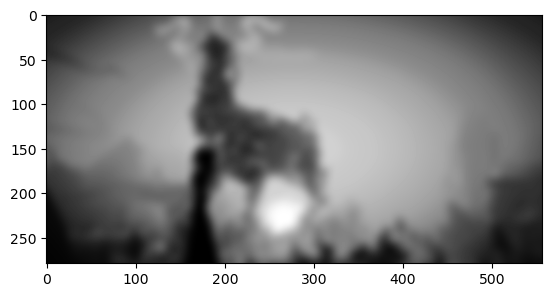

In [5]:
# 对图像进行滤波
gaussian_filtered_image = conv2d(s, gaussian_filter)
plt.imshow(gaussian_filtered_image, cmap='gray')

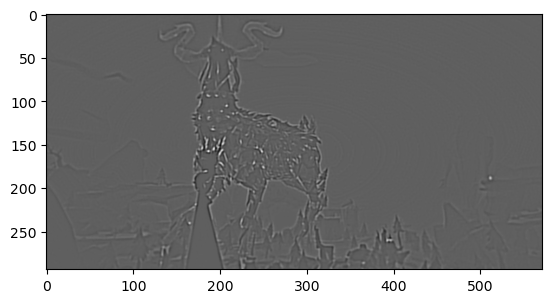

In [6]:
dog_filtered_image = conv2d(s, dog_filter)
plt.imshow(dog_filtered_image, cmap='gray')

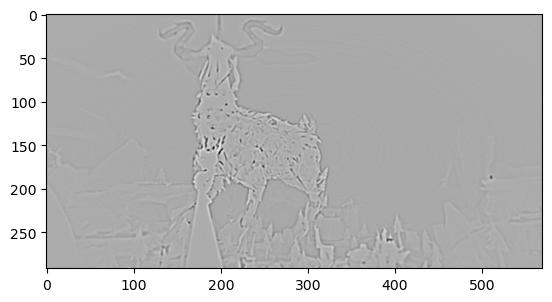

In [7]:
log_filtered_image = conv2d(s, log_filter)
plt.imshow(log_filtered_image, cmap='gray')

3、编程实现Harris角点检测算法

In [8]:
def harris_corner_detection(img, k=0.04, threshold=0.01):
    # 计算图像梯度
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    dx = conv2d(img, sobel_x, padding=True)
    dy = conv2d(img, sobel_y, padding=True)

    # 计算Harris响应函数
    ix2 = dx * dx
    iy2 = dy * dy
    ixy = dx * dy

    kernel = np.ones((3, 3))
    ix2 = conv2d(ix2, kernel, padding=True)
    iy2 = conv2d(iy2, kernel, padding=True)
    ixy = conv2d(ixy, kernel, padding=True)

    det = ix2 * iy2 - ixy * ixy
    trace = ix2 + iy2
    harris_response = det - k * trace * trace
    # 阈值化和非极大值抑制
    corners = []
    for y in range(1, img.shape[0] - 1):
        for x in range(1, img.shape[1] - 1):
            if harris_response[y, x] > threshold * harris_response.max() and \
                    harris_response[y, x] > harris_response[y - 1, x] and \
                    harris_response[y, x] > harris_response[y + 1, x] and \
                    harris_response[y, x] > harris_response[y, x - 1] and \
                    harris_response[y, x] > harris_response[y, x + 1]:
                corners.append((x, y))

    return corners

In [9]:
def drawcircle(img, o, r):
    #补充相关功能
    thickness = 1
    h, w = img.shape
    ox, oy = o
    for i in range(h):
        for j in range(w):
            d = math.hypot(i - oy, j - ox)
            if r >= d >= r-thickness:
                s[i][j] = 255

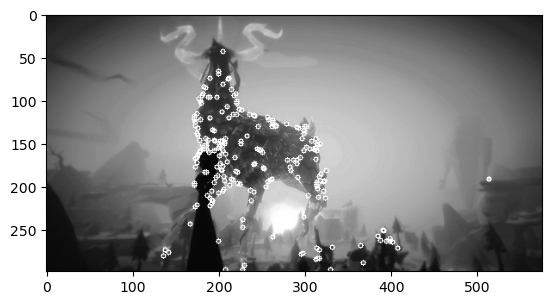

In [17]:
# 执行Harris角点检测
corners = harris_corner_detection(s)

# 绘制角点
for corner in corners:
    drawcircle(s, corner, 3)
plt.imshow(s, cmap='gray')